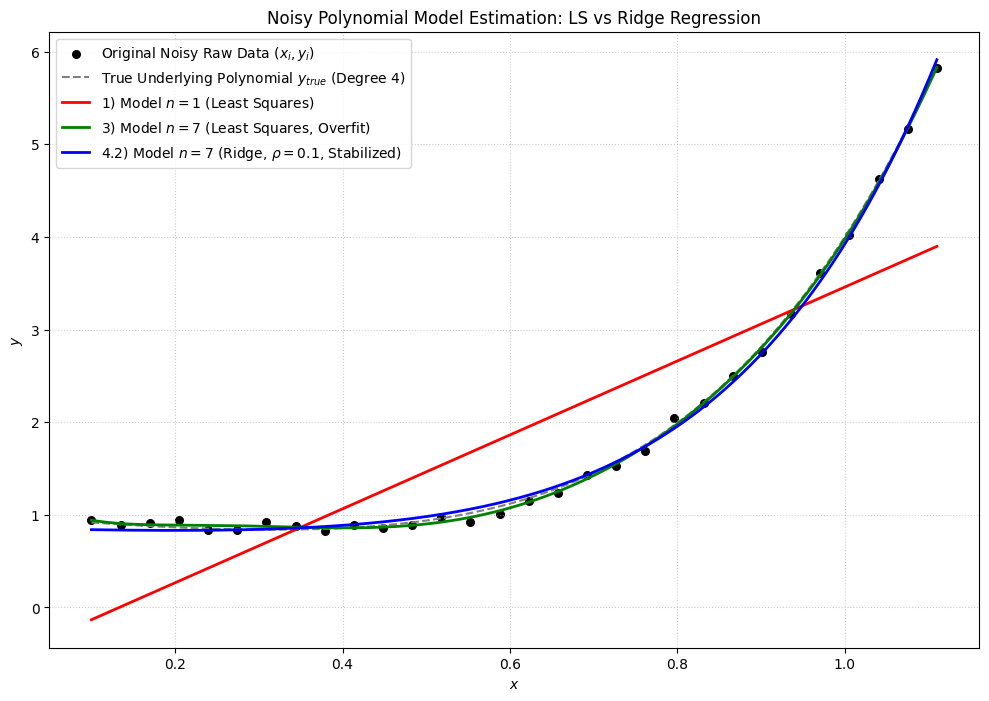

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# --- 1. Parameters and Data Generation ---
k = 11 # From Pattanaphol
N = 30
R = 1 + k/100 # 1.11
sigma = 0.05
np.random.seed(42) # for reproducibility


# Generate x values
x = np.linspace(0.1, R, N)


# True function: y_true = 5x^4 - 3x^3 + 2x^2 - x + 1
y_true_func = lambda x: 5*x**4 - 3*x**3 + 2*x**2 - x + 1
y_true = y_true_func(x)
noise = np.random.normal(0, sigma, N)
y_noisy = y_true + noise


# --- 2. Helper Functions ---
def vandermonde_matrix(x, degree):
    """Constructs the Vandermonde matrix A = [x^n, ..., x^1, 1]"""
    return np.vander(x, degree + 1, increasing=False)


def estimate_coefficients(A, B, rho=0):
    """Calculates coefficients X* for LS (rho=0) or Ridge (rho>0)."""
    # X* = (A^T A + rho*I)^-1 * A^T B
    AT = A.T
    ATA = AT @ A
    I = np.identity(ATA.shape[0])
   
    # Calculate X* using the generalized solution
    XTX_plus_rhoI_inv = np.linalg.inv(ATA + rho * I)
    X_star = XTX_plus_rhoI_inv @ AT @ B
    return X_star


def poly_val(x_plot, X_star):
    """Evaluates the polynomial on x_plot using coefficients X_star."""
    degree = len(X_star) - 1
    A_plot = np.vander(x_plot, degree + 1, increasing=False)
    return A_plot @ X_star


# --- 3. Coefficient Estimation (LS & RR) ---
B = y_noisy.reshape(-1, 1)


# Calculate all models for plotting
X_star1 = estimate_coefficients(vandermonde_matrix(x, 1), B, rho=0)
X_star7_ls = estimate_coefficients(vandermonde_matrix(x, 7), B, rho=0)
X_star7_rr2 = estimate_coefficients(vandermonde_matrix(x, 7), B, rho=0.1)


# --- 4. Plotting ---
x_plot = np.linspace(x.min(), x.max(), 500)
y_model1 = poly_val(x_plot, X_star1)
y_model7_ls = poly_val(x_plot, X_star7_ls)
y_model7_rr2 = poly_val(x_plot, X_star7_rr2)
y_true_plot = y_true_func(x_plot)


plt.figure(figsize=(12, 8))


# Raw Data (Scatter Plot)
plt.scatter(x, y_noisy, label='Original Noisy Raw Data $(x_i, y_i)$', color='k', marker='o', s=30)
plt.plot(x_plot, y_true_plot, label='True Underlying Polynomial $y_{true}$ (Degree 4)', color='gray', linestyle='--')


# Estimated Models (Line Plots)
plt.plot(x_plot, y_model1, label='1) Model $n=1$ (Least Squares)', color='r', linestyle='-', linewidth=2)
plt.plot(x_plot, y_model7_ls, label='3) Model $n=7$ (Least Squares, Overfit)', color='g', linestyle='-', linewidth=2)
plt.plot(x_plot, y_model7_rr2, label=r'4.2) Model $n=7$ (Ridge, $\rho=0.1$, Stabilized)', color='b', linestyle='-', linewidth=2)




plt.title('Noisy Polynomial Model Estimation: LS vs Ridge Regression')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)


plt.show()
